<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [615]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [616]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [617]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [618]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [619]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [620]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [621]:
!pip install gpy

In [622]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

import matplotlib.pyplot as plt

In [623]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

## Shared Functions

In [624]:
#Shared functions

#Describe a dataframe
def describe_data(df_name,df):
  output= f"Name:{df_name}\n"
  output+=f"Shape:{df.shape}\n"
  output+=f"Head:\n{df.head(3).to_string()}\n\n"
  output+=f"Describe:\n{df.describe().to_string()}\n"
  output+="-----------------------------------------------------------------------"
  output+="\n\n"
  return output


#Plot the detail of a column
def plotColumn(df, column):
    fig = plt.figure(figsize=(20,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    df[column].hist(bins=50)
    #
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel(column)
    ax2.set_ylabel('Values')
    df.boxplot(column=[column])
    plt.show()

#Plot the correlation of one field to the others in the dataset
def plotCorrelations(df,column):
  corr = df[df.columns].corr()[column][:].sort_values(ascending=True).to_frame()
  fig, ax = plt.subplots(figsize =(9, 9))
  ax.barh(corr.index, corr[column], align='center', color = np.where(corr[column] < 0, 'red', 'green'))




# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [625]:
#Data files
filename1="HousePrice_Train.csv"
filename2="HousePrice_Test.csv"

In [626]:
#Check if running on colab, use local path if not
from IPython import get_ipython
RunningInCOLAB = 'google.colab' in str(get_ipython())
Path = "data/"
if RunningInCOLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    Path = "/content/drive/MyDrive/data/house_prices/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [627]:
# training dataset: 
training_file = Path+filename1
# test dataset: 
testing_file = Path+filename2

In [628]:
#Read in the training data
dftrain = pd.read_csv(training_file)
print(describe_data("df_train",dftrain))



Name:df_train
Shape:(1638, 14)
Head:
   Index        ID      Location  Num_Bathrooms  Num_Beds BER_class                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [629]:
#Read in the test data
dftest = pd.read_csv(testing_file)
print(describe_data("df_test",dftest))


Name:df_test
Shape:(702, 13)
Head:
   Index        ID   Location  Num_Bathrooms  Num_Beds BER_class                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Prepare Data

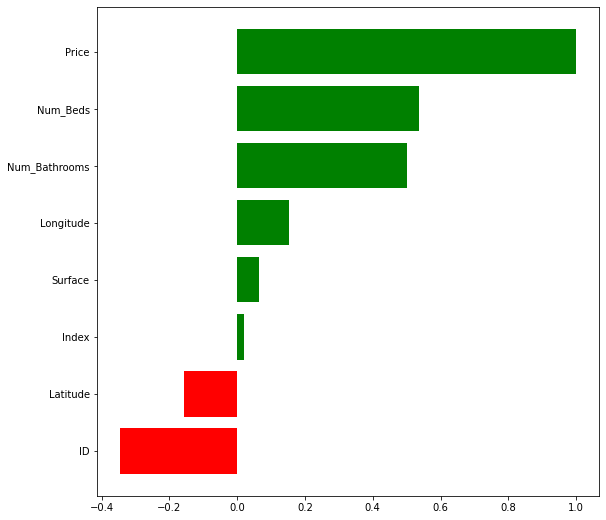

In [630]:
#Plot the correlations against price - numeric fields
plotCorrelations(dftrain,"Price")

The fields stringly correlated with Price are:

Num_beds, Num_Bathrooms, Longitude & Latitude

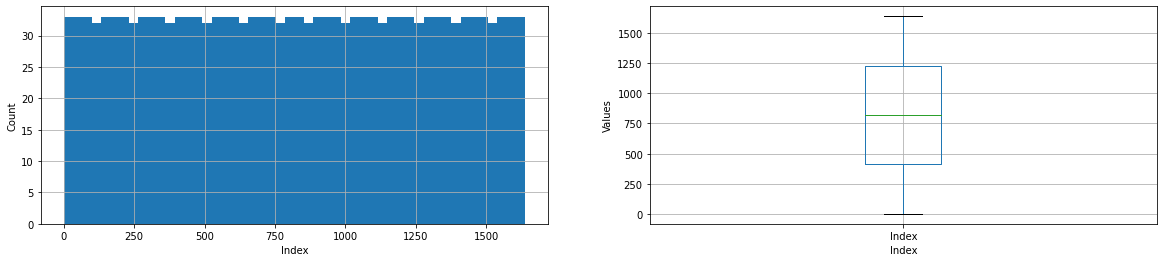

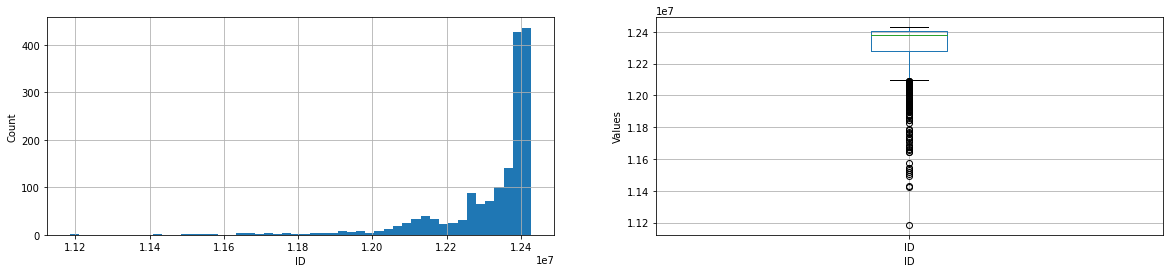

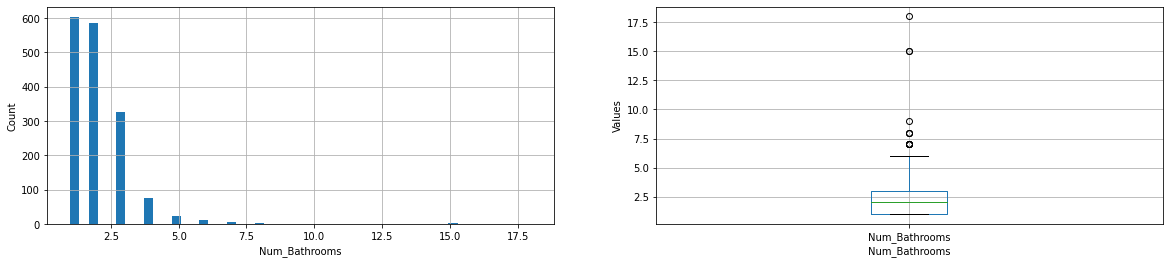

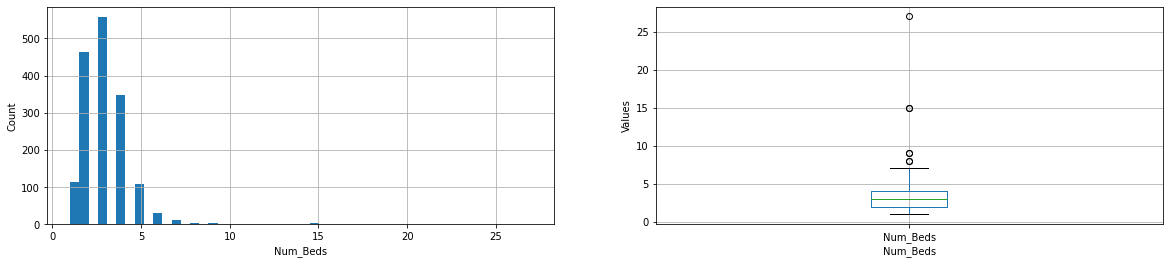

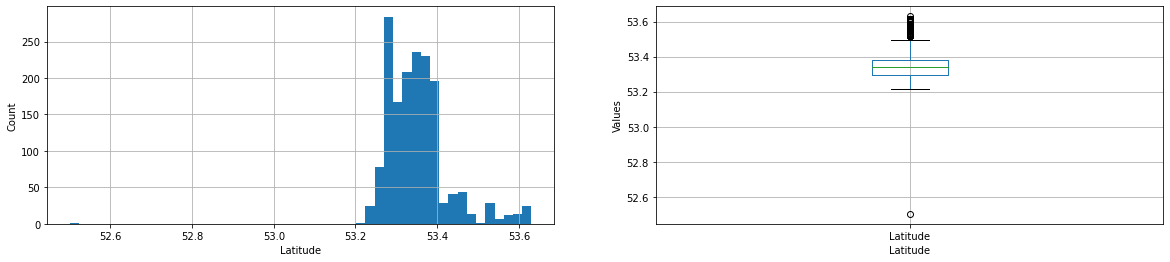

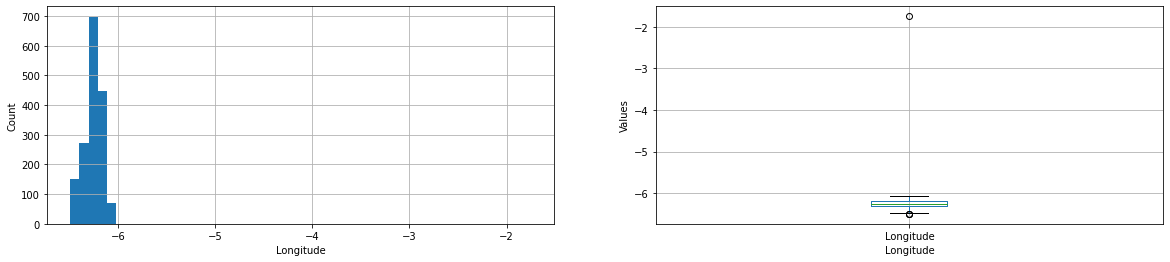

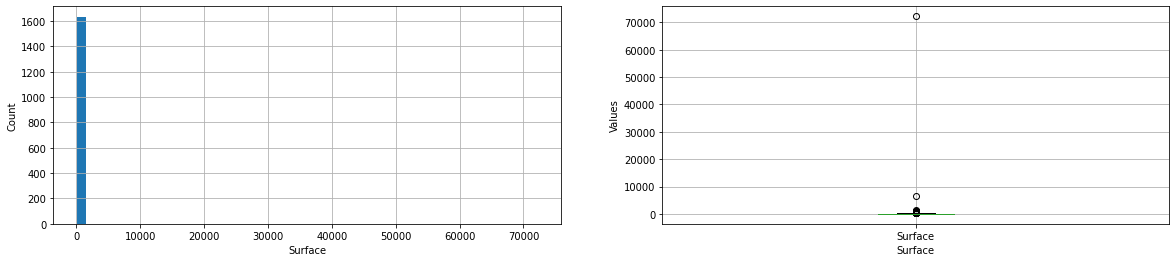

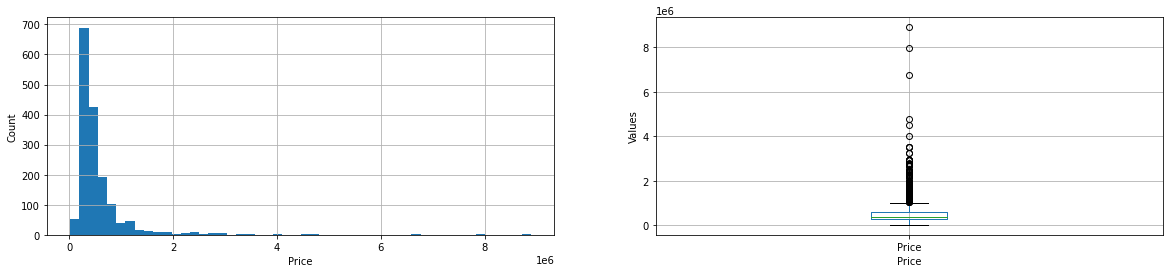

In [631]:
#Check histogram and outliers
from pandas.api.types import is_numeric_dtype

for column in dftrain:
  #ignore the encoded property columns
  if is_numeric_dtype(dftrain[column]):
    plotColumn(dftrain,column)

In [632]:
#check for nulls
print(dftrain.isna().sum())

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64


In [633]:
#check for nulls
print(dftest.isna().sum())

Index              0
ID                 0
Location           0
Num_Bathrooms      0
Num_Beds           0
BER_class        108
Description        0
Services         456
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
dtype: int64


We need to create a function that can be applied to both train and test to remove unecessary fields and to encode BER_class and type.

In [634]:
def process_data(df):
  if ('ID') in df:
    #Encode the BER col into numeric values and fill nulls with mean
    BER_map = {
        "A1": 1,"A2": 2,"A3": 3,"B1": 4,"B2": 5,"B3": 6,
        "C1": 7,"C2": 8,"C3": 9,"D1": 10,"D2": 11,"E1": 12,
        "E2": 13,"F": 14,"G": 15,"SINo666of2006exempt" : 16
    }
    df['BER_class_num'] = df['BER_class'].replace(BER_map)
    df['BER_class_num'] = df['BER_class_num'].fillna(value=int(df['BER_class_num'].mean()))

    #Extract features from the services column
    df["Parking"] = df["Services"].str.contains("Parking",case=False)
    df["Alarm"] = df["Services"].str.contains("Alarm",case=False)
    df["Heating"] = df["Services"].str.contains("Heating",case=False)

    df["Parking"] = df["Parking"].fillna(False)
    df["Alarm"] = df["Alarm"].fillna(False)
    df["Heating"] = df["Heating"].fillna(False)

    #Remove unneeded columns:
    # ID not needed as it is a system value
    # Location not needed as we have lat/lon
    # Services has too many missing values to be useful
    df=df.drop(columns=['ID','Location','Services','BER_class'])

    #One hot encode the Type feature
    df = pd.get_dummies(df, columns=['Type'], drop_first=False)

    return df


In [635]:
#apply pre-processing to training data
dftrain = process_data(dftrain)

#apply pre-processing to test data
dftest = process_data(dftest)

### Remove Outliers

In [636]:
#Latitude has two outliers < 53 - remove them
dftrain.drop(dftrain[dftrain['Latitude'] < 53].index, inplace=True)

#Longitude has two outliers > -4 - remove them
dftrain.drop(dftrain[dftrain['Longitude'] > -4].index, inplace=True)

#Bathroom has several outliers > 10 - remove them
dftrain.drop(dftrain[dftrain['Num_Bathrooms'] > 10].index, inplace=True)

#Bedroom has one outlier > 20
dftrain.drop(dftrain[dftrain['Num_Beds'] > 10].index, inplace=True)

#Surface has three outliers > 50000
dftrain.drop(dftrain[dftrain['Surface'] > 50000].index, inplace=True)

In [637]:
dftrain.head(20)

Index  Num_Bathrooms  Num_Beds  ... Type_studio Type_terraced  Type_townhouse
0       1              2         2  ...           0             0               0
1       2              1         2  ...           0             1               0
2       3              3         3  ...           0             0               0
3       4              1         3  ...           0             0               0
4       5              3         4  ...           0             0               0
5       6              1         3  ...           0             1               0
6       7              1         2  ...           0             0               0
7       8              2         4  ...           0             0               0
8       9              3         2  ...           0             1               0
9      10              2         2  ...           0             0               0
10     11              1         3  ...           0             0               0
11     12              1         3  ...           0             0               0
12     13              3         3  ...           0             0               0
13     14              4         5  ...           0             0               0
14     15              1         2  ...           0             0               0
15     16              1         3  ...           0             0               0
16     17              2         3  ...           0             0               0
17     18              3         4  ...           0             0               0
18     19              1         3  ...           0             0               0
19     20              1         2  ...           0             0               0

[20 rows x 23 columns]

## Log Transformation
Apply a log transform to remove any skew in the data

In [638]:
def log_transform(df,features):
  for feature in features:
    df[feature] = np.log(abs(df[feature]))
  return df

features = ['Latitude','Longitude','Num_Bathrooms','Num_Beds']

#Apply to both train and test
dftrain = log_transform(dftrain,features)
dftest = log_transform(dftest,features)


## Scaling
Apply standard scaling to test and train

In [639]:
# normalize into 0 to 1 range
sc = StandardScaler()

features = ['Latitude','Longitude','Num_Bathrooms','Num_Beds'] #,'Price'
xscaler = sc.fit(dftrain[features])
dftrain[features] = xscaler.transform(dftrain[features])

features = ['Latitude','Longitude','Num_Bathrooms','Num_Beds']
xscaler_test = sc.fit(dftest[features])
dftest[features] = xscaler_test.transform(dftest[features])


## Training & Test Data

### Train dataset

In [640]:
# show first data frame rows 
dftrain.head()

Index  Num_Bathrooms  Num_Beds  ... Type_studio Type_terraced  Type_townhouse
0      1       0.225177 -0.784040  ...           0             0               0
1      2      -1.159590 -0.784040  ...           0             1               0
2      3       1.035214  0.183026  ...           0             0               0
3      4      -1.159590  0.183026  ...           0             0               0
4      5       1.035214  0.869170  ...           0             0               0

[5 rows x 23 columns]

In [641]:
# Generate descriptive statistics
dftrain.describe()

Index  Num_Bathrooms  ...  Type_terraced  Type_townhouse
count  1633.000000   1.633000e+03  ...    1633.000000     1633.000000
mean    819.620943   7.075717e-17  ...       0.183099        0.008573
std     473.218249   1.000306e+00  ...       0.386866        0.092222
min       1.000000  -1.159590e+00  ...       0.000000        0.000000
25%     410.000000  -1.159590e+00  ...       0.000000        0.000000
50%     820.000000   2.251772e-01  ...       0.000000        0.000000
75%    1229.000000   1.035214e+00  ...       0.000000        0.000000
max    1638.000000   3.230018e+00  ...       1.000000        1.000000

[8 rows x 18 columns]

# NATURAL LANGUAGE PROCESSING

The approach here is to use NLP to create new features that will improve accuracy

In [642]:
#Download a stopword list
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#Stop Words
swords = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The process starts with a reusable function to clean the wordlists. This includes removing non alphabetic characters, removing short words, lemmatizing and removing stop words.

In [643]:
#generic function to pre-process a textual column

def process_wordlist(df, column_in, column_out, testing=False):
  # removing everything except alphas
  df[column_out] = df[column_in].str.replace("[^a-zA-Z#]", " ")
  
  # removing short words
  short_word = 3
  df[column_out] = df[column_out].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

  # make all text lowercase
  df[column_out] = df[column_out].apply(lambda x: x.lower())

  if testing is True: print("After Lower Case: "+df.iloc[0][column_out])

  # stemmer - this returns a tokenised list
  stemmer = SnowballStemmer('english', ignore_stopwords=False)
  df[column_out] = df[column_out].apply(lambda x: [stemmer.stem(y) for y in x.split()])

  if testing is True: print(f"After Stem: {df.iloc[0][column_out]}")

  # lemmatisation
  lem = WordNetLemmatizer()
  df[column_out] = df[column_out].apply(lambda x: [lem.lemmatize(y) for y in x])

  if testing is True: print(f"After Lem: {df.iloc[0][column_out]}")

  # remove stop-words
  df[column_out] = df[column_out].apply(lambda x: [item for item in x if item not in swords])

  if testing is True: print(f"After Stop: {df.iloc[0][column_out]}")

  #detokenize
  df[column_out] = df[column_out].apply(lambda x: ' '.join([w for w in x]))

  if testing is True: print(f"After Detokenize: {df.iloc[0][column_out]}")

  return df

In [644]:
#Test the word processor on a small example
data_x = {'Description': ['Studying STUDIES from where studied study dog dogs', 'th1s 2nd one has numbers 21 + 55', 'this A.M.V. â‚¬285,000 is # complex €23 - $33 / 76.23'], 'Price': [1234, 4567, 5678]}   
df_x = pd.DataFrame(data_x) 
df_x_clean = process_wordlist(df_x, 'Description', 'Description_Clean',True)
df_x_clean.head()

After Lower Case: studying studies from where studied study dogs
After Stem: ['studi', 'studi', 'from', 'where', 'studi', 'studi', 'dog']
After Lem: ['studi', 'studi', 'from', 'where', 'studi', 'studi', 'dog']
After Stop: ['studi', 'studi', 'studi', 'studi', 'dog']
After Detokenize: studi studi studi studi dog


Description  ...            Description_Clean
0  Studying STUDIES from where studied study dog ...  ...  studi studi studi studi dog
1                   th1s 2nd one has numbers 21 + 55  ...                       number
2  this A.M.V. â‚¬285,000 is # complex €23 - $33 ...  ...                      complex

[3 rows x 3 columns]

In [645]:
dftrain_clean = process_wordlist(dftrain, 'Description', 'Description_Clean')
dftrain_clean = process_wordlist(dftrain, 'Features', 'Features_Clean')
dftrain_clean.head()

#Check the output
print(f"---------------------------------\nORIGINAL\n {dftrain_clean.iloc[0]['Description']}")
print(f"---------------------------------\nCLEAN\n {dftrain_clean.iloc[0]['Description_Clean']}")

---------------------------------
ORIGINAL
 DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. 

This well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.

Chipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.

Viewing comes highly recomme

## Word Frequency

In [646]:
#Find the most frequently occuring 'Description' words
word_counts = dftrain_clean.Description_Clean.str.split(expand=True).stack().value_counts()

print(word_counts.shape)

wordlist = word_counts.reset_index().values.tolist()
wordlist = np.array(wordlist)

dfwords=pd.DataFrame(wordlist,columns=['words','freq'])
dfwords.head(20)


(6522,)


words  freq
0      floor  8552
1    bedroom  7951
2       room  7669
3     garden  4619
4       tile  4044
5    kitchen  3916
6       rear  3874
7      doubl  3692
8   properti  3295
9      locat  3101
10      area  3049
11      door  2981
12      larg  2967
13  bathroom  2934
14      live  2865
15      park  2828
16       fit  2762
17    window  2750
18    access  2735
19     front  2638

This wordcound does not appear to be particularly useful. We will now look at TF-IDF to identify important words in the word list. We will firstly check the description feature.

In [647]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [648]:
#Get all words into one string
all_words = []
for i in range(dftrain_clean.shape[0]):
  all_words.append(dftrain_clean.iloc[i]['Description_Clean'])
print(all_words[1])

northbrook terrac charm brick period home seclud locat within walk distanc dublin citi centr behind brick light fill accommod offer contemporari feel maintain charm origin featur high ceil ceil cove beauti cast iron fireplac antiqu style radiat welcom entranc hallway finish beauti american floor light abov door flood space natur light lead spacious interconnect recept room garden access french door kitchen locat hallway space fit modern high gloss wall floor unit plumb dishwash wash machin ampl dine space creat ideal place relax featur floor ceil window flood space natur light french door lead garden upstair generous doubl bedroom featur fireplac sash window american floor bathroom return featur roll bath complet accommod level appeal charm home convert attic space flood natur light light offer ideal space wide varieti use outsid seclud south face rear garden mainten laid gravel featur rais patio area make trap ideal space dine alfresco ideal locat ensur charm home walk distanc connoll

In [649]:
#Apply TF-IDF to the full word list
CV = CountVectorizer()
word_count = CV.fit_transform(all_words)


tfidfTransform = TfidfTransformer(use_idf=True)
tf_idf = tfidfTransform.fit_transform(word_count)
df = pd.DataFrame(tf_idf[0].T.todense(), index=CV.get_feature_names(), columns=['tf_idf'])
df = df.sort_values('tf_idf', ascending=False)
print(df.head(20))

            tf_idf
chip      0.361501
extens    0.210191
bedroom   0.195288
manag     0.193211
apart     0.184863
core      0.164168
ongar     0.161788
suit      0.155978
larg      0.153031
lamin     0.145310
design    0.140287
doubl     0.136063
pharmaci  0.132503
come      0.131990
floor     0.129514
ampl      0.123950
fit       0.123862
viewer    0.120640
benefit   0.119288
compani   0.118218


In [650]:
#Get all 'Feature' words into one string
all_words = []
for i in range(dftrain_clean.shape[0]):
  all_words.append(dftrain_clean.iloc[i]['Features_Clean'])
all_words.remove('none')
print(all_words[0])

bight spacious interior numer origin featur includ cast iron fireplac high ceil ceil cove sash window fire central heat south face maintain rear garden rais patio total floor area approx sqft exclud attic room approx ideal locat within walk distanc dublin citi centr ifsc


In [651]:
tfidfTransform = TfidfTransformer(use_idf=True)
CV = CountVectorizer()
word_count = CV.fit_transform(all_words)
tf_idf = tfidfTransform.fit_transform(word_count)
df = pd.DataFrame(tf_idf[0].T.todense(), index=CV.get_feature_names(), columns=['tf_idf'])
df = df.sort_values('tf_idf', ascending=False)
print(df.head(20))

            tf_idf
ceil      0.298151
bight     0.262675
approx    0.234230
rais      0.231437
exclud    0.215414
cast      0.207807
cove      0.201591
iron      0.201591
ifsc      0.196336
sash      0.191784
total     0.189717
numer     0.182513
interior  0.173946
sqft      0.159704
origin    0.151602
fireplac  0.150315
patio     0.149690
maintain  0.147879
ideal     0.146160
attic     0.130347


## Add New Features

This gives us a list of words ranked by importance. This wil be used to add additional features.

In [652]:
#Adding features for the most important words
def add_word_features(df,important_words,column):
  for word in important_words:
    df['word_'+word] = dftrain_clean[column].str.contains(' '+word,case=False)
    df['word_'+word] = df['word_'+word].fillna(False)
  return df

#Description
important_words = ['chip','extens','bedroom','manag','apart','core']
dftrain_clean = add_word_features(dftrain_clean,important_words,'Description_Clean')
dftest = add_word_features(dftest,important_words,'Description_Clean')

#Features
important_words = ['ceil','bight','rais','exclud','cast','ifsc']
dftrain_clean = add_word_features(dftrain_clean,important_words,'Features_Clean')
dftest = add_word_features(dftest,important_words,'Features_Clean')



In [653]:
dftrain.head()

Index  Num_Bathrooms  Num_Beds  ... word_exclud word_cast  word_ifsc
0      1       0.225177 -0.784040  ...       False     False      False
1      2      -1.159590 -0.784040  ...        True      True       True
2      3       1.035214  0.183026  ...       False     False      False
3      4      -1.159590  0.183026  ...       False     False      False
4      5       1.035214  0.869170  ...       False     False      False

[5 rows x 37 columns]

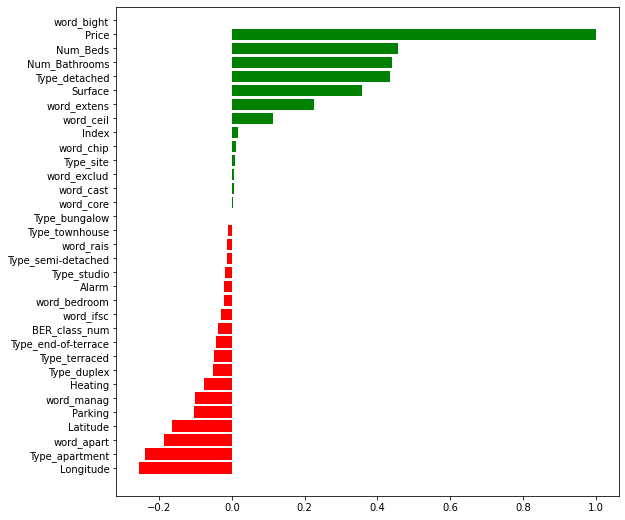

In [654]:
#Plot the correlations against price
plotCorrelations(dftrain_clean,"Price")

The above correlation shows that the words 'chip' and 'core' are not strongly linked to price. The remaining words are however significant.

In [655]:
dftrain_clean.head()

Index  Num_Bathrooms  Num_Beds  ... word_exclud word_cast  word_ifsc
0      1       0.225177 -0.784040  ...       False     False      False
1      2      -1.159590 -0.784040  ...        True      True       True
2      3       1.035214  0.183026  ...       False     False      False
3      4      -1.159590  0.183026  ...       False     False      False
4      5       1.035214  0.869170  ...       False     False      False

[5 rows x 37 columns]

# PIECEWISE REGRESSION

In [656]:
featrain = ['Latitude','Longitude','Num_Bathrooms','Num_Beds','Type_apartment','Type_detached','word_extens',
            'word_manag','word_apart','word_ceil','word_ifsc','Parking','Alarm','Heating','Price']

# dropna: remove missing values
df_subset_train = dftrain_clean[featrain].dropna(axis=0)

featest = ['Latitude','Longitude','Num_Bathrooms','Num_Beds','Type_apartment','Type_detached','word_extens',
            'word_manag','word_apart','word_ceil','word_ifsc','Parking','Alarm','Heating']

df_subset_test = dftest[featest].dropna(axis=0)

df_subset_train.head()

Latitude  Longitude  Num_Bathrooms  ...  Alarm  Heating   Price
0  0.618722   1.955251       0.225177  ...  False    False  195000
1  0.083461  -0.190874      -1.159590  ...  False    False  425000
2 -1.145647  -0.377450       1.035214  ...  False    False  535000
3 -1.211702  -0.995756      -1.159590  ...  False    False  499000
4  2.701181  -1.500004       1.035214  ...  False    False  510000

[5 rows x 15 columns]

In [657]:
# train set, input columns
X_train_full = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train_full = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 

We need to split the data into train/validation as the test data does not have output values

In [658]:
Xs_train,Xs_val,ys_train,ys_val = train_test_split(X_train_full, ys_train_full, test_size=0.2)
ys_train = ys_train.reshape(-1,1)


We now standardize the train/test data

In [659]:
ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = ys_train #yscaler.transform(ylog)

In [660]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

Xss_val = np.hstack([Xs_val,Xs_val[:,[2]]**2])
Xn_val = xscaler.transform(Xss_val)

## Baseline Model

Will initialy try linear regression against the full dataset

In [661]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

In [662]:
#fit the model
model = LinearRegression().fit(Xn_train, yn_train)
print('Score:', model.score(Xn_train, yn_train))

Score: 0.4602651097067405


In [663]:
#Generate a prediction with validation data
y_pred_val = model.predict(Xn_val)
print(y_pred_val.shape)
print("============================================")
print("Baseline Regression")
print("MAE = ",(np.mean(abs(y_pred_val - ys_val))))
print("MAPE = ",(np.mean(abs(y_pred_val - ys_val) / ys_val)))
print("============================================")

(327, 1)
Baseline Regression
MAE =  192717.50775504875
MAPE =  0.3637085632143014


The overall performance of the full model is quite poor with a MAPE of 0.43

In [664]:
#Generate a prediction with test data
y_pred = model.predict(Xn_test)
print(y_pred.shape)


(702, 1)


In [665]:
#Output the results of the baseline model to file
dfindex = dftest
dfvalue=pd.DataFrame(abs(y_pred),columns=['Price'])
prediction = pd.concat([dfindex,dfvalue], axis=1)
prediction.to_csv(Path+"prediction_morganlynch_8908079_full.csv")

## Piecewise Model

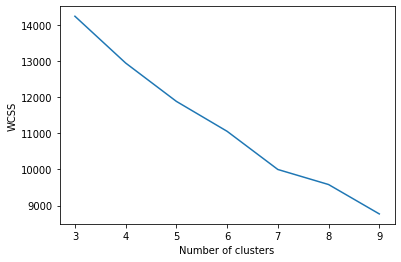

In [666]:
# Find the optimal number of clusters - for lat/lon
from sklearn import cluster

k_list=np.arange(3,10)
wcss=[]
for k in k_list:
    output = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(Xn_train)
    wcss.append(output.inertia_)

plt.plot(k_list,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow is shown at 5 clusters

In [667]:
num_clusters = 5
cluster_list = np.arange(0,num_clusters)

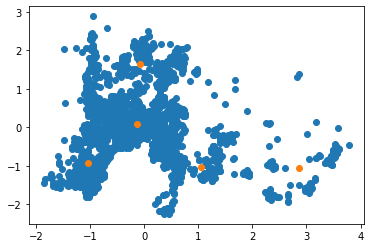

In [668]:
# training gaussian mixture model with 6 clusters
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=num_clusters)
# clustering by features lat/lon
ind=[0,1]
X_ind = np.vstack([Xs_train[:,ind],Xs_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

In [669]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))


{0: 80, 1: 643, 2: 223, 3: 118, 4: 242}

In [670]:
# validation clusters
clusters_test = gmm.predict(Xn_val[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 14, 1: 180, 2: 52, 3: 37, 4: 44}

In [671]:
#Split the data into the clusters
#Xn_train = Xs_train
#Xn_test = Xs_test

Xn=[]
Xvaln=[]
ylog=[]
yscaler=[]
yn=[]

for c in cluster_list:
  Xn.append(Xn_train[clusters_train==c,:])
  Xvaln.append(Xn_val[clusters_test==c,:])

  ylog.append(np.log(ys_train.astype('float')[clusters_train==c,:]))
  yscaler.append(StandardScaler().fit(ylog[c]))
  yn.append(yscaler[c].transform(ylog[c]))

In [672]:
print(Xn_train[clusters_train==0,:])

[[ 2.25090019 -0.95867285  1.00611859 ... -0.36021908 -0.58855055
   0.06147318]
 [ 3.41699347 -0.67908045  1.00611859 ... -0.36021908 -0.58855055
   0.06147318]
 [ 3.44639262 -0.64982803  0.19800853 ... -0.36021908 -0.58855055
  -0.88686284]
 ...
 [ 3.43760344 -0.63292306  0.19800853 ... -0.36021908  1.69908939
  -0.88686284]
 [ 3.04081253 -1.57155129 -1.18346474 ... -0.36021908  1.69908939
   0.31503525]
 [ 1.88249775 -1.18801838  0.19800853 ... -0.36021908  1.69908939
  -0.88686284]]


In [673]:
#Generic function to get the posterior and prediction
def getPosterior(Xn,yn,iter,Xn_test,yscaler,clusternum):
  with pm.Model() as model:
    # prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    # we have a beta for each column of Xn0
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn.shape[1])
    # prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    # linear regression relationship
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn.T)
    # likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn[:,0])
  with model:
    approximation = pm.fit(40000,method='advi')

  #Get the posterior   
  posterior = approximation.sample(5000)

  # prediction
  #ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
  #y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
  #mae=(np.mean(abs(y_pred_BLR - y_test[clusters_test==clusternum])))
  #mape=(np.mean(abs(y_pred_BLR - y_test[clusters_test==clusternum]) / y_test[clusters_test==clusternum]))

  return posterior #, y_pred_BLR #, mae, mape

In [674]:
posterior_list=[]
mae_list=[]
mape_list=[]
y_pred_list = []
y_pred_test_list = []
for c in cluster_list:
  p = getPosterior(Xn[c],yn[c],40000,Xvaln[c],yscaler[c],c)
  posterior_list.append(p)
  print(f"Model {c}")
  print("------------------------------------------\n")

Finished [100%]: Average Loss = 168.45


Model 0
------------------------------------------



Finished [100%]: Average Loss = 708


Model 1
------------------------------------------



Finished [100%]: Average Loss = 270.67


Model 2
------------------------------------------



Finished [100%]: Average Loss = 194.94


Model 3
------------------------------------------



Finished [100%]: Average Loss = 284.25


Model 4
------------------------------------------



In [675]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

## Apply the validation dataset

In [676]:
yn_val = ys_val

In [677]:
def valset(cluster_num,yscaler,posterior,Xtestn):
  y_pred = np.exp(yscaler.inverse_transform(np.mean(posterior['alpha']) 
              + np.dot(np.mean(posterior['beta'],axis=0), Xtestn.T)))
  return y_pred

In [678]:
y_pred_val = []
for c in cluster_list:
  y_pred_val.append(valset(c,yscaler[c],posterior_list[c],Xvaln[c]))
  

In [679]:
yn_val=np.concatenate(yn_val, axis=0 )

joint=np.hstack([abs(y_pred_val[0] - yn_val[clusters_test==0]),
                 abs(y_pred_val[1] - yn_val[clusters_test==1]),
                 abs(y_pred_val[2] - yn_val[clusters_test==2]),
                 abs(y_pred_val[3] - yn_val[clusters_test==3]),
                 abs(y_pred_val[4] - yn_val[clusters_test==4])])

joint_mape = np.mean(np.hstack([
                        abs(y_pred_val[0] - yn_val[clusters_test==0]) /yn_val[clusters_test==0],
                        abs(y_pred_val[1] - yn_val[clusters_test==1]) /yn_val[clusters_test==1],
                        abs(y_pred_val[2] - yn_val[clusters_test==2]) /yn_val[clusters_test==2],
                        abs(y_pred_val[3] - yn_val[clusters_test==3]) /yn_val[clusters_test==3],
                        abs(y_pred_val[4] - yn_val[clusters_test==4]) /yn_val[clusters_test==4]
                       ]))

print("============================================")
print("Piecewise Regression")
print("MAE = ",(np.mean(joint)))
print("MAPE = ",(joint_mape))
print("============================================")

Piecewise Regression
MAE =  148491.8627032556
MAPE =  0.2147373712989108


This is a significant improvement on the baseline with a MAPE of 0.21

## Apply the test dataset

We will need to apply the clustering to the test dataset and then build a prediction based on that.

The indexes will need to be clustered also so that they can be merged with correct predictions at the end

In [680]:
indexes=dftest.Index[:, None]
#indexes = np.dtype([('Index', np.int)])
#print(indexes)

#print(dftest.iloc[0])
print(Xn_test.shape)

#merge index column from original dataframe with Xtestn
X_final = np.hstack((indexes,Xn_test))
#print(X_final[0])
print(X_final.shape)

(702, 15)
(702, 16)


In [681]:
# final test clusters
clusters_final = gmm.predict(X_final[:,ind])
unique_test, counts_test = np.unique(clusters_final, return_counts=True)
dict(zip(unique_test, counts_test))

{2: 702}

The indexes will be needed to match the clusters later so they are included when spplitting the data out into the clusters but then removed for processing

In [682]:
X_final_list = []
index_list = []
for c in cluster_list:
  #Get X including the index
  this_list = X_final[clusters_final==c,:]
  #Store the indexes for this cluster
  index_list.append(this_list[:,0])
  #Store X without indexes
  X_final_list.append(this_list[:,1:])

In [683]:
#Apply model to test set
def testset(cluster_num,yscaler,posterior,Xtestn):
  y_pred = np.exp(yscaler.inverse_transform(np.mean(posterior['alpha']) 
              + np.dot(np.mean(posterior['beta'],axis=0), Xtestn.T)))
  
  return y_pred

In [684]:
y_pred_final = []
for c in cluster_list:
  y_pred_final.append(testset(c,yscaler[c],posterior_list[c],X_final_list[c]))

In [685]:
#Join y_pred back with the indexes to create the final output
y_pred_output = []
for c in cluster_list:
  y_pred_output.append(np.hstack((index_list[c][:, None], y_pred_final[c][:, None])))



In [686]:
#Generate combined output file
output = np.vstack((y_pred_output[0],y_pred_output[1],y_pred_output[2],y_pred_output[3],y_pred_output[4]))

In [687]:
dfoutput = pd.DataFrame({"Index" :  output[:,0] , "Price" : output[:,1]})
dfoutput.to_csv(Path+"prediction_morganlynch_8908079_piecewise.csv")

# BAYESIAN NN

Start by resetting the variables

In [688]:
X_new_train = Xn_train #.astype(float)
X_new_test = Xn_val

In [689]:
scaler = StandardScaler()
y_new_train = scaler.fit_transform(ys_train)

In [690]:
print(X_new_train[0])
print(X_new_train.shape)

[ 1.16939944 -1.07874481  1.00611859  0.84706865 -0.58383424 -0.41515285
 -0.52358986 -0.29260773 -0.61333959 -0.1867225  -0.08784105 -0.67044803
 -0.36021908 -0.58855055  0.06147318]
(1306, 15)


In [691]:
print(y_new_train[0])
print(y_new_train.shape)

[0.41336738]
(1306, 1)


In [692]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
#x1 = np.vstack([np.ones(len(X_new_train)), X_new_train]).T
x1 = np.hstack([np.ones((X_new_train.shape[0],1)), X_new_train])
#x1 = x1.astype(float)
print(x1[0])
print(x1.shape)

floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', y_new_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

[ 1.          1.16939944 -1.07874481  1.00611859  0.84706865 -0.58383424
 -0.41515285 -0.52358986 -0.29260773 -0.61333959 -0.1867225  -0.08784105
 -0.67044803 -0.36021908 -0.58855055  0.06147318]
(1306, 16)


In [693]:
# some parameters
par1 = 100 # start with 100, then use 1000+
par2 = 1000 # start with 1000, then use 10000+
 
# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 108 tune and 0 draw iterations (108 + 0 draws total) took 36 seconds.
No posterior samples. Unable to run convergence checks


In [694]:
# we can do instead an approximated inference
param3 = 10000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.01    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 1,664.1


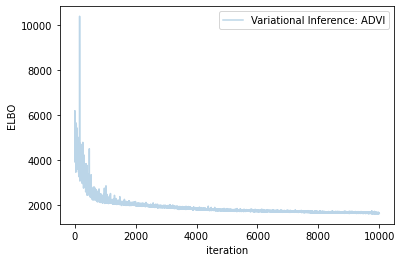

In [695]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [696]:
# draw samples from variational posterior
D = 400
posterior = approx.sample(draws=D)

In [697]:
X_new_test.shape

(327, 15)

In [698]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((X_new_test.shape[0],1)), X_new_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [699]:
#inverse transform the predicted values
ylog = np.log(ys_train.astype('float'))
ys = StandardScaler().fit(ylog)
y_pred2 = np.exp(ys.inverse_transform(y_pred))

In [700]:
mae = np.mean(abs(y_pred2 - yn_val))
mape = np.mean(abs(y_pred2 - yn_val) / yn_val)

print("============================================")
print("Bayesian Neural Network")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print("============================================")

Bayesian Neural Network
MAE: 189447.59415158982
MAPE: 0.3158806519799165


### Predict prices for test data

In [701]:
x_test = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred_test = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x_test.T))
    #outer layer
    y_pred_test.append(np.dot(posterior['w_0'][i,:],t1))

# predictions:   
y_pred_test = np.array(y_pred_test).mean(axis=0)
y_pred_test = np.exp(ys.inverse_transform(y_pred_test))

In [702]:
#Output BNN predictions to file
dfindex = dftest['Index']
dfindex.columns=['Index']
dfvalue=pd.DataFrame(y_pred_test,columns=['Price'])
prediction = pd.concat([dfindex,dfvalue], axis=1)
prediction.to_csv(Path+"Bayesian_morgan_lynch_8908079.csv")

# SUMMARY

The objective of this exercise was to use supervised machine learning to determine house prices.

#### Data Processing
The data was initially loaded and an initial examination made. Based on this the BER class column was transformed into numeric values and the ID, Location and Services columns were dropped.

There were also several outliers in the Latitude, Longitude, bathrooms, beds and surface columns which were dropped.

A log transform was then applied to the latitude, longitude, bathrooms and beds columns.

#### Natural Language Processing
A general processing function was then created to process the testual columns in the dataset. This included remiving any non alphabetical characters, removing short words ( less than 3 chars), applying a stemmer, allpying lemmatization and removing any stop words.

This function was then applied to both the description and feature columns in both the ttraining and test datasets.

These columns were then processed to generate a TF-IDF score for the frequently occuring words. The resulting scores were then sorted and the important words identified.

Based on this several new features were added to the data indicating if the important words were present in the description or features text.

#### Baseline Model

The training data was then split into train and validation datasets.

A standard linear regression was then performed against this training data and it's performance measured. This resulted in a MAPE of approx 42%.

#### Piecewise Regression

Using Kmeans clustering the data was anlysed and 5 clusters identified.
A piecewise regression was then run against these clusters which resulted in an overall MAPE of 21% which was a significant improvement on the baseline model.

This model was then run against the test data and a prediction generated to file.

#### Bayesian NN
Finally the data was processed using a Bayesian neural network.

This model was then run against the test data and a prediction generated to file. This generated a MAPE of 32% which was not an improvement on the piecewise approach.

#### Overall Result


| Metric | Baseline Model | Piecewise Model | Bayesian NN |
| :- | -: | -: | -: |
| MAE | 207926.41 | 157349.69 | 189447.59 |
| MAPE | 0.42186 | 0.21473 | 0.31588 |


Overall the piecewise model performed best